# Analysing the results of the directed search for masks and gloves

In [2]:
#importing needed packages
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
from ema_workbench.analysis import parcoords

c:\users\pmg00\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


## Epsilon Progress

In [3]:
# plot epsilon progress
epsilon_progress=pd.read_csv('./data/5000_convergence_gloves_simple_masks.csv', delimiter = ';')
epsilon_progress = epsilon_progress.drop(['Unnamed: 0'], axis=1)
epsilon_progress

,epsilon_progress,nfe
0,0,0
1,7,100
2,19,1100
3,32,2100
4,40,3100
5,44,4100


Text(0, 0.5, '$\\epsilon$-progress')

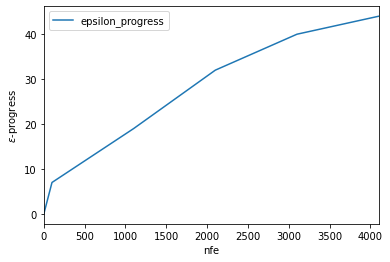

In [4]:
ax = plt.gca()
epsilon_progress.plot(kind='line',x='nfe',y='epsilon_progress',ax=ax)
ax.set_ylabel('$\epsilon$-progress')
# plt.savefig('figures/epsilonprogress_gloves_masks_4000.png')

In [6]:
results=pd.read_csv('./data/5000_results_directed_search_gloves_simple_masks.csv', delimiter = ';', decimal= ",")
results = results.drop(['Unnamed: 0'], axis=1)
results

,Switch procurement world market PPE,Switch direct tender PPE,Switch domestic production PPE,Switch innovation PPE,Delay domestic production PPE,Direct tender set up time PPE,Set up time procurement PPE worldwide,Setting up innovation process PPE,Time to check PPE,Shipment time to hospitals PPE,...,Inital value for gowns in stockpile UK,Inital value for gloves in stockpile UK,Preparation time for delivery PPE,Government budget for PPE,Urgentness,Coverage simple masks,Coverage N95 respirators,Coverage gowns,Coverage gloves,Total normalized coverage eye protection
0,1,1,0,0,35.377030,8.413188,17.358077,42.157708,1.000169,1.090442,...,2.494956e+07,4.108037e+08,1.596486,0.989259,2.193718,207.979156,206.387131,194.205124,205.963486,209.968750
1,1,0,0,1,36.574279,7.010967,14.992074,42.174420,1.000112,1.000941,...,2.995716e+07,5.219646e+08,1.000199,0.918422,0.032959,204.698730,205.694626,195.942993,200.576645,206.519699
2,1,1,0,0,23.215865,9.954801,21.589363,33.604144,1.052343,1.112234,...,1.508445e+07,2.528772e+08,1.058548,0.442247,1.114974,209.968750,206.557999,192.065750,206.139664,209.968750
3,1,1,1,0,7.058378,8.026509,14.167908,40.474519,1.000561,1.217061,...,3.912791e+07,7.077718e+06,1.012483,0.392144,3.856532,209.968750,205.362000,198.873215,209.968750,209.968750
4,1,1,1,1,15.993722,10.089344,19.083389,44.475135,1.018599,1.358309,...,2.775017e+07,3.838682e+08,1.005272,0.525812,0.944024,203.994308,203.994308,199.807037,203.994308,203.994308
5,1,1,1,0,59.428965,7.060486,17.251808,23.241281,1.004870,1.011116,...,5.289510e+06,5.380567e+08,1.088522,0.790561,2.613036,209.968750,206.193207,180.711823,206.409790,209.968750


## Trade-off plots to investigate differences between policies

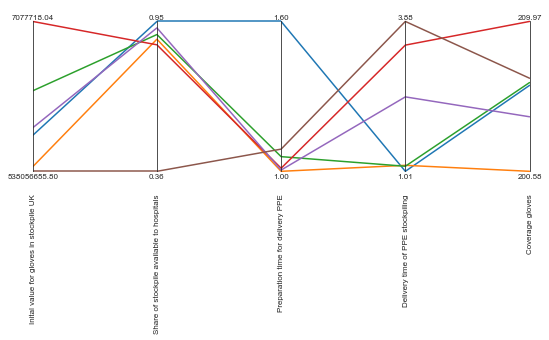

In [13]:
#plote tradeoffs between stockpile characteristics and checking and delivery times
levers_of_interest_stockpile_gloves = ['Inital value for gloves in stockpile UK', 
                           'Share of stockpile available to hospitals', 
                           'Preparation time for delivery PPE', 
                           'Delivery time of PPE stockpiling',
#                                'Share of products expiring per day',
                               'Coverage gloves',]

data_stockpile_no_direct= results.reindex(columns=levers_of_interest_stockpile_gloves)

limits = parcoords.get_limits(data_stockpile_no_direct)
paraxes = parcoords.ParallelAxes(limits, fontsize=8)
paraxes.plot(data_stockpile_no_direct)
paraxes.invert_axis('Inital value for gloves in stockpile UK')

fig=plt.gcf()
fig.set_size_inches(8,6)
plt.savefig('figures/trade_off_stockpile_gloves_4000.png')
plt.show()

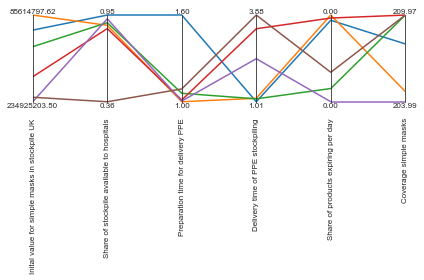

In [7]:
#plote tradeoffs between initial amount of PPE in stockpile, coverage, preparation time delivery, share of stockpile available to hospitals
data_PPE = results.loc[:, ['Inital value for simple masks in stockpile UK', 
                          'Share of stockpile available to hospitals', 
                           'Preparation time for delivery PPE', 
                           'Delivery time of PPE stockpiling',
                               'Share of products expiring per day',
                          'Coverage simple masks', ]]

limits = parcoords.get_limits(data_PPE)
paraxes = parcoords.ParallelAxes(limits, fontsize=8)
paraxes.plot(data_PPE)
paraxes.invert_axis('Inital value for simple masks in stockpile UK')

fig=plt.gcf()
fig.set_size_inches(6,4)
plt.savefig('figures/trade_off_stockpile_4000_masks.png')
plt.show()


In [8]:
#want summaries of what procurement strategies have been used for PPE and ventilators
Sum_column = pd.DataFrame(results.sum(axis=0))
Sum_column_switches_PPE = Sum_column[:-32]


In [9]:
#average order buffers
order_buffer_PPE = results.iloc[:,14:18]
Mean_order_buffer_PPE= pd.DataFrame(order_buffer_PPE.mean())

In [10]:
Mean_order_buffer_PPE_list = Mean_order_buffer_PPE[0].values.tolist()

Sum_column_switches_PPE_list = Sum_column_switches_PPE[0].values.tolist()

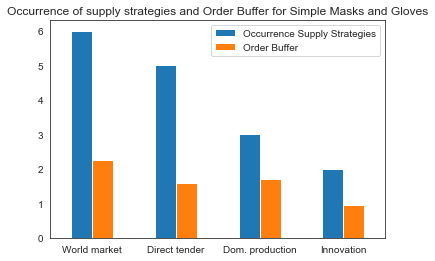

In [12]:
index = ['World market', 'Direct tender', 'Dom. production','Innovation']
df = pd.DataFrame({'Occurrence Supply Strategies': Sum_column_switches_PPE_list,
                   'Order Buffer': Mean_order_buffer_PPE_list}, index=index)
ax = df.plot.bar(rot=0)
plt.title(label='Occurrence of supply strategies and Order Buffer for Simple Masks and Gloves')
plt.savefig('figures/occurence_orderbuffer_masks_gloves.png')

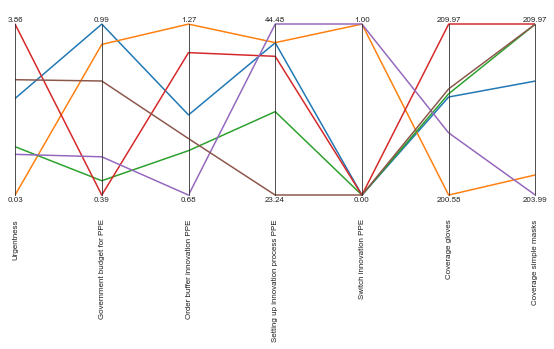

In [74]:
#plote tradeoffs between stockpile characteristics and checking and delivery times
levers_of_interest_innovation = ['Urgentness',
                           'Government budget for PPE',
                           'Order buffer innovation PPE', 
                           'Setting up innovation process PPE',
                          'Switch innovation PPE',
                          'Coverage gloves',
                          'Coverage simple masks']

data_innovation= results.reindex(columns=levers_of_interest_innovation)

limits = parcoords.get_limits(data_innovation)
paraxes = parcoords.ParallelAxes(limits, fontsize=8)
paraxes.plot(data_innovation)

fig=plt.gcf()
fig.set_size_inches(8,6)
plt.savefig('figures/trade_off_innovation_4000.png')
plt.show()

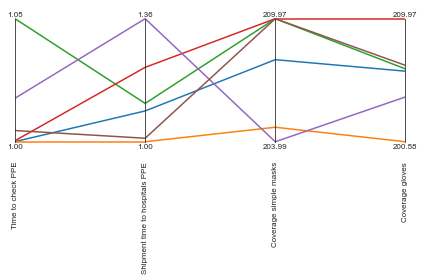

In [22]:
# operational details of strategies regarding delays of interest as trade-offs
# to show that better operation is needed to operate at a higher level
data_PPE = results.loc[:, ['Time to check PPE', 
                           'Shipment time to hospitals PPE', 
                          'Coverage simple masks',
                          'Coverage gloves']]

limits = parcoords.get_limits(data_PPE)
paraxes = parcoords.ParallelAxes(limits, fontsize=8)
paraxes.plot(data_PPE)
# paraxes.invert_axis('Inital value for gowns in stockpile UK')

fig=plt.gcf()
fig.set_size_inches(6,4)
plt.savefig('figures/operational_4000_all.png')
plt.show()

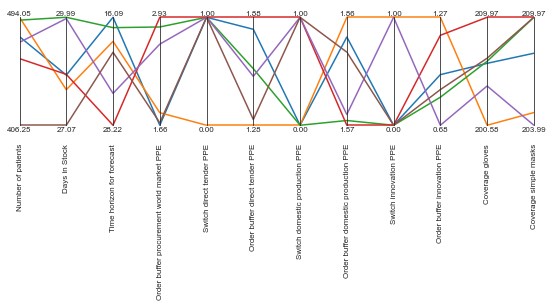

In [20]:
# tradeoff regarding decision-framework

data_PPE = results.loc[:, ['Number of patients', 
                           'Days in Stock',  
                           'Time horizon for forecast',
                           'Order buffer procurement world market PPE',
#                            'Switch procurement world market PPE',                        
                           'Switch direct tender PPE',
                           'Order buffer direct tender PPE',                       
                           'Switch domestic production PPE',
                           'Order buffer domestic production PPE',
                           'Switch innovation PPE',
                           'Order buffer innovation PPE',
#                            'Inital value for gloves in stockpile UK',           
                           'Coverage gloves',
                          'Coverage simple masks']]

limits = parcoords.get_limits(data_PPE)
paraxes = parcoords.ParallelAxes(limits, fontsize=8)
paraxes.plot(data_PPE)
paraxes.invert_axis('Time horizon for forecast')
# paraxes.invert_axis('Inital value for gloves in stockpile UK')

fig=plt.gcf()
fig.set_size_inches(8,5)
plt.savefig('figures/DecisionFramework_4000PPE.png')
plt.show()

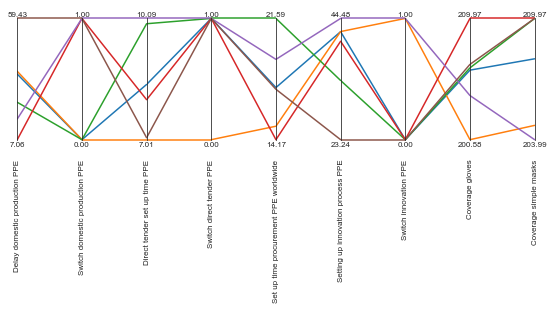

In [21]:
# trade-off set up times combined with decision-framework

data_PPE = results.loc[:, ['Delay domestic production PPE',
                            'Switch domestic production PPE',
                           'Direct tender set up time PPE',
                            'Switch direct tender PPE',
                           'Set up time procurement PPE worldwide',
#                             'Switch procurement world market PPE',
                           'Setting up innovation process PPE',
                            'Switch innovation PPE',
                          'Coverage gloves',
                          'Coverage simple masks']]

limits = parcoords.get_limits(data_PPE)
paraxes = parcoords.ParallelAxes(limits, fontsize=8)
paraxes.plot(data_PPE)

fig=plt.gcf()
fig.set_size_inches(8,5)
# plt.savefig('figures/Set_up_times_4000PPE.png')
plt.show()

In [88]:
candidate_policies = results.drop(['Preparation time for Delivery PPE'], axis =1)

In [91]:
candidate_policies.to_csv('./data/candidate_policy_step4_simplemasks_gloves.csv')